In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from pandas.io.json._normalize import nested_to_record

pd.set_option('display.max_columns', None)

In [2]:
offers = pd.read_csv('offers.csv')

In [3]:
offers.head(10)

,id,ref,client_ref,product_ref,category_id,retailer_id,user_id,image_id,product_id,product,offer_price,regular_price,one_unit_price,quantity_unit,quantity,valid_from,valid_to,expiration_date,limited,published,created_at,updated_at
0,1183,99260f77b61dc4d85298cead50ecd17f,NaN,NaN,8,171,NaN,366,292,Vanilla cake with coconut,4.80,8.0,0.0,pcs,14.0,2020-04-21 21:35:00,2020-04-24 21:35:00,NaN,1,1,2020-04-22 03:06:02,NaN
1,1186,b95845260698ff4e0c1e251f2bd527f9,7.038010e+12,7.038010e+12,7,345,NaN,709,295,"LETTMELK 0,5%",9.45,18.9,0.0,item,3.0,2020-04-22 05:34:00,2020-04-25 05:34:00,NaN,1,0,2020-04-22 11:04:28,2020-04-24 23:02:05
2,1189,764506d1c360a4c43b217cdbb8e6f763,7.040512e+12,7.040512e+12,7,345,NaN,712,298,MANGO STK CEVITA,16.45,32.9,0.0,item,0.0,2020-04-22 08:44:27,2020-04-25 08:44:26,NaN,1,0,2020-04-22 14:14:27,2020-04-22 15:13:01
3,1192,df4b0e35622f5f04d1d18797252a1429,7.023026e+12,7.023026e+12,7,340,NaN,715,301,OST & SKINKESALAT,21.45,42.9,0.0,item,0.0,2020-04-22 09:55:00,2020-04-25 09:55:00,NaN,1,0,2020-04-22 15:25:52,2020-04-25 01:07:45
4,1195,a694a495c774f065abbe76e8505314f5,7.023026e+12,7.023026e+12,7,332,NaN,634,304,TACOSALAT,21.45,42.9,0.0,item,0.0,2020-04-22 09:59:07,2020-04-25 09:59:06,NaN,1,0,2020-04-22 15:29:07,2020-04-22 15:37:01
5,1198,bbcf6d6d2b34e3b8cd160ad756fc9943,7.020098e+12,7.020098e+12,7,332,NaN,688,307,SVINESTRIMLER,10.00,59.9,0.0,item,1.0,2020-04-22 10:00:07,2020-04-25 10:00:07,NaN,1,1,2020-04-22 15:30:07,2020-04-22 15:43:01
6,1201,f72cc647d35456be74d9b3ac5b28bdc3,7.038010e+12,7.038010e+12,7,345,NaN,718,310,LETTMELK 1%,9.95,19.9,0.0,item,0.0,2020-04-22 10:24:24,2020-04-25 10:24:23,NaN,1,0,2020-04-22 15:54:24,2020-04-22 17:22:01
7,1204,3e3f8fdb3588579377ed988387820d5e,7.023026e+12,7.023026e+12,7,708,NaN,721,313,SPINAT,14.95,29.9,0.0,item,0.0,2020-04-22 11:51:51,2020-04-25 11:51:51,NaN,1,0,2020-04-22 17:21:51,2020-04-22 21:44:01
8,1207,f57b4ff30f4a870ec23a123aae045557,7.038010e+12,7.038010e+12,7,335,NaN,724,316,KREMFLØTE 37%,10.75,21.5,0.0,item,0.0,2020-04-22 11:57:14,2020-04-25 11:57:13,NaN,1,0,2020-04-22 17:27:14,2020-04-22 17:57:01
9,1210,a319949343f1c80888afdee7d019cfe7,7.023026e+12,7.023026e+12,7,708,NaN,727,319,RUCCULA,10.95,21.9,0.0,item,0.0,2020-04-22 12:01:54,2020-04-25 12:01:54,NaN,1,0,2020-04-22 17:31:54,2020-04-22 17:51:01


In [ ]:
offers.shape

In [6]:
offers.describe()

,id,client_ref,product_ref,category_id,retailer_id,user_id,image_id,product_id,offer_price,regular_price,one_unit_price,quantity,expiration_date,limited,published
count,2.078032e+06,2.078031e+06,2.078031e+06,2.078032e+06,2.078032e+06,0.0,2.078032e+06,2.078032e+06,2.078032e+06,2.078032e+06,2.078032e+06,2.078032e+06,0.0,2078032.0,2.078032e+06
mean,3.083496e+06,4.932795e+12,4.895533e+12,7.000001e+00,5.938430e+02,NaN,1.369251e+04,8.183961e+03,2.915476e+01,5.573155e+01,3.115291e+01,3.596661e-01,NaN,1.0,2.381109e-01
std,1.798367e+06,2.991192e+12,3.037059e+12,9.810447e-04,2.945700e+02,NaN,1.406923e+04,1.009892e+04,2.597108e+01,4.848091e+01,4.565901e+01,3.885613e+02,NaN,0.0,4.259274e-01
min,1.183000e+03,1.000000e+00,1.000000e+00,7.000000e+00,1.710000e+02,NaN,3.660000e+02,2.920000e+02,1.000000e-02,9.000000e-02,0.000000e+00,-5.577650e+05,NaN,1.0,0.000000e+00
25%,1.524407e+06,2.000700e+12,2.000693e+12,7.000000e+00,2.810000e+02,NaN,1.270000e+03,1.810000e+03,1.495000e+01,2.990000e+01,0.000000e+00,0.000000e+00,NaN,1.0,0.000000e+00
50%,3.082764e+06,7.023026e+12,7.023026e+12,7.000000e+00,6.350000e+02,NaN,5.735000e+03,3.610000e+03,2.236000e+01,4.290000e+01,1.500000e+01,0.000000e+00,NaN,1.0,0.000000e+00
75%,4.641287e+06,7.038010e+12,7.038010e+12,7.000000e+00,8.700000e+02,NaN,3.044200e+04,9.526000e+03,3.493000e+01,6.672000e+01,4.195000e+01,0.000000e+00,NaN,1.0,0.000000e+00
max,6.199603e+06,2.453768e+15,2.453768e+15,8.000000e+00,1.066000e+03,NaN,4.439500e+04,4.524400e+04,1.178600e+03,1.683710e+03,2.660000e+03,1.900000e+03,NaN,1.0,1.000000e+00


In [7]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078032 entries, 0 to 2078031
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   ref              object 
 2   client_ref       float64
 3   product_ref      float64
 4   category_id      int64  
 5   retailer_id      int64  
 6   user_id          float64
 7   image_id         int64  
 8   product_id       int64  
 9   product          object 
 10  offer_price      float64
 11  regular_price    float64
 12  one_unit_price   float64
 13  quantity_unit    object 
 14  quantity         float64
 15  valid_from       object 
 16  valid_to         object 
 17  expiration_date  float64
 18  limited          int64  
 19  published        int64  
 20  created_at       object 
 21  updated_at       object 
dtypes: float64(8), int64(7), object(7)
memory usage: 348.8+ MB


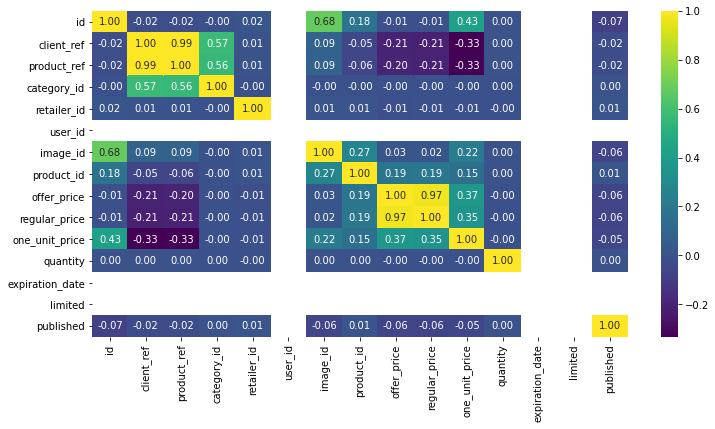

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(offers.corr(), cmap='viridis', annot=True, fmt='.2f')

In [16]:
df = offers.drop(['user_id', 'expiration_date','updated_at'], axis = 1)

In [17]:
df.isnull().sum()

id                0
ref               0
client_ref        1
product_ref       1
category_id       0
retailer_id       0
image_id          0
product_id        0
product           0
offer_price       0
regular_price     0
one_unit_price    0
quantity_unit     0
quantity          0
valid_from        0
valid_to          0
limited           0
published         0
created_at        0
dtype: int64

In [7]:
df.shape

(2078032, 19)

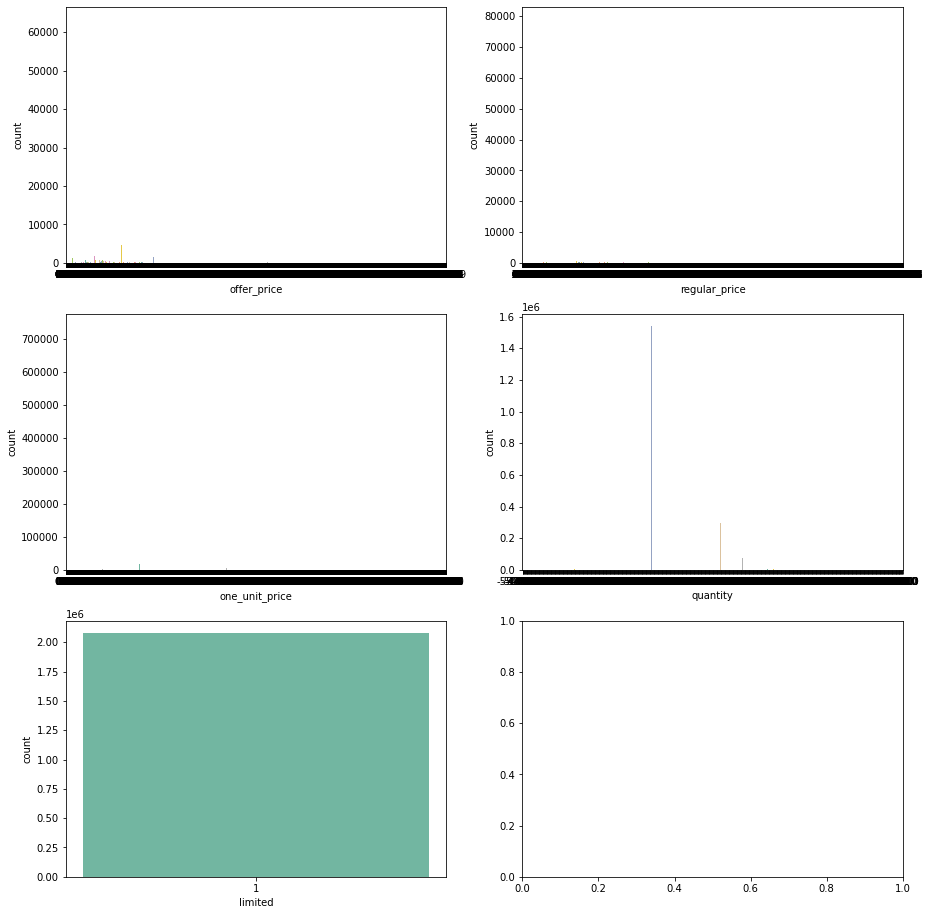

In [20]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(df['offer_price'], ax=ax[0,0], palette='Set2')
_=sns.countplot(df['regular_price'], ax=ax[0,1], palette='Set2')
_=sns.countplot(df['one_unit_price'], ax=ax[1,0], palette='Set2')
_=sns.countplot(df['quantity'], ax=ax[1,1], palette='Set2')
_=sns.countplot(df['limited'], ax=ax[2,0], palette='Set2')


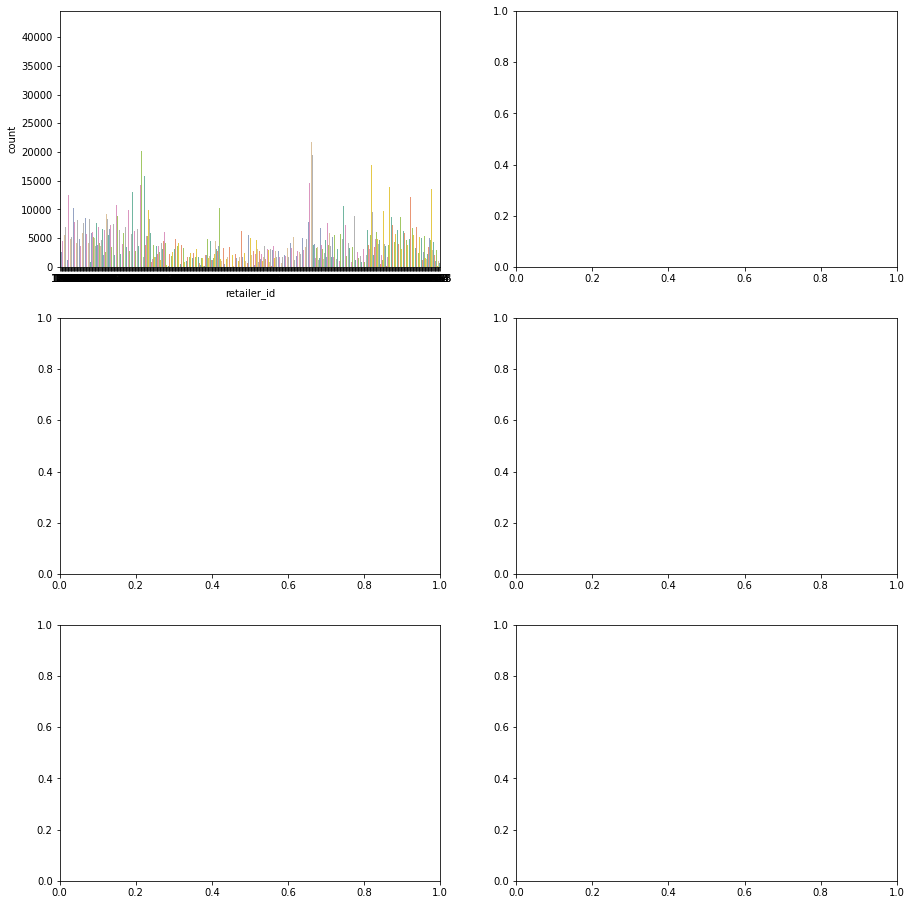

In [8]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(df['retailer_id'], ax=ax[0,0], palette='Set2')

In [18]:
df.drop(columns=to_drop, inplace=True, axis=1)

In [26]:
df['product'].value_counts()

KYLLINGLÅR KRYDRET      36725
KYLLINGFILET            33165
KARBONADER              29750
BACONBURGER             23737
SVIN INDREFILET         23604
                        ...  
MARSIPANKAKESTANG           1
LABELLO                     1
AMTMANNINNERING             1
HORTENSIA SNITT             1
PAKXE MØRK NATUR SET        1
Name: product, Length: 9545, dtype: int64

In [31]:
df.head(10)

,category_id,product_id,product,offer_price,regular_price,one_unit_price,quantity_unit,quantity,limited
0,8,292,Vanilla cake with coconut,4.80,8.0,0.0,pcs,14.0,1
1,7,295,"LETTMELK 0,5%",9.45,18.9,0.0,item,3.0,1
2,7,298,MANGO STK CEVITA,16.45,32.9,0.0,item,0.0,1
3,7,301,OST & SKINKESALAT,21.45,42.9,0.0,item,0.0,1
4,7,304,TACOSALAT,21.45,42.9,0.0,item,0.0,1
5,7,307,SVINESTRIMLER,10.00,59.9,0.0,item,1.0,1
6,7,310,LETTMELK 1%,9.95,19.9,0.0,item,0.0,1
7,7,313,SPINAT,14.95,29.9,0.0,item,0.0,1
8,7,316,KREMFLØTE 37%,10.75,21.5,0.0,item,0.0,1
9,7,319,RUCCULA,10.95,21.9,0.0,item,0.0,1


In [20]:
to_drop = ['ref',
...            'client_ref',
               'product_ref',
...            'retailer_id',
               'image_id', 
               'created_at',
               'id',
               'created_at']

In [28]:
to_drop = ['published','valid_from','valid_to']

In [29]:
df.drop(columns=to_drop, inplace=True, axis=1)

In [66]:
df.head

AttributeError: 'function' object has no attribute 'head'

In [33]:
df.to_csv('Data_Final.csv')

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import category_encoders as ce

In [4]:
dataset = pd.read_csv('Data_Final.csv')


In [5]:
dataset

,Unnamed: 0,category_id,product_id,product,offer_price,regular_price,one_unit_price,quantity_unit,quantity,limited
0,0,8,292,Vanilla cake with coconut,4.80,8.0,0.00,pcs,14.0,1
1,1,7,295,"LETTMELK 0,5%",9.45,18.9,0.00,item,3.0,1
2,2,7,298,MANGO STK CEVITA,16.45,32.9,0.00,item,0.0,1
3,3,7,301,OST & SKINKESALAT,21.45,42.9,0.00,item,0.0,1
4,4,7,304,TACOSALAT,21.45,42.9,0.00,item,0.0,1
...,...,...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,FAMILIEBRØD,9.95,19.9,9.95,item,2.0,1
2078028,2078028,7,325,HELMELK,11.45,22.9,11.45,item,0.0,1
2078029,2078029,7,418,KYLLING KJØTTDEIG,21.95,43.9,21.95,item,1.0,1
2078030,2078030,7,1270,COTTAGE CHEESE,28.63,40.9,28.63,item,3.0,1


In [6]:
print(dataset['product'].unique())

['Vanilla cake with coconut' 'LETTMELK 0,5%' 'MANGO STK CEVITA' ...
 'ZIPPO' 'VÅRRULLPLATER' 'GRØNNSAK BULJONG']


In [7]:
dataset.drop(['product','quantity_unit'], axis=1)

,Unnamed: 0,category_id,product_id,offer_price,regular_price,one_unit_price,quantity,limited
0,0,8,292,4.80,8.0,0.00,14.0,1
1,1,7,295,9.45,18.9,0.00,3.0,1
2,2,7,298,16.45,32.9,0.00,0.0,1
3,3,7,301,21.45,42.9,0.00,0.0,1
4,4,7,304,21.45,42.9,0.00,0.0,1
...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,9.95,19.9,9.95,2.0,1
2078028,2078028,7,325,11.45,22.9,11.45,0.0,1
2078029,2078029,7,418,21.95,43.9,21.95,1.0,1
2078030,2078030,7,1270,28.63,40.9,28.63,3.0,1


In [9]:
X = dataset[['category_id', 'product_id', 'regular_price', 'one_unit_price', 'quantity', 'limited']]
y = dataset['offer_price']
X

,category_id,product_id,regular_price,one_unit_price,quantity,limited
0,8,292,8.0,0.00,14.0,1
1,7,295,18.9,0.00,3.0,1
2,7,298,32.9,0.00,0.0,1
3,7,301,42.9,0.00,0.0,1
4,7,304,42.9,0.00,0.0,1
...,...,...,...,...,...,...
2078027,7,4531,19.9,9.95,2.0,1
2078028,7,325,22.9,11.45,0.0,1
2078029,7,418,43.9,21.95,1.0,1
2078030,7,1270,40.9,28.63,3.0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes = (200, 200, 200, 200, 200), activation = 'relu', solver = 'adam', max_iter = 500, learning_rate = 'adaptive')
regressor.fit(X_train, y_train)

In [ ]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

In [ ]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.head(10)

In [ ]:
datasetPredict.corr()

In [ ]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

In [ ]:
#MSE


from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))



In [ ]:
#MAPE

def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
#Visualise



import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()



In [ ]:
#SVM
regressor = SVR(C = 1000)
regressor.fit(X_train, y_train)

In [ ]:
SVR (C = 100.0, cache_size = 200, coef0 = 0.0, degree = 3, epsilon = 0.1, gamma = 'scale', kernel = 'rbf',
     max_iter = -1, shrinking = True, tol = 0.001, verbose = False)

In [ ]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

In [ ]:
#Evaluate model
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

In [ ]:
#Compare rrget and predicted



datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.head(10)


In [ ]:
datasetPredict.corr()

In [ ]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

In [ ]:


from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))



In [ ]:


import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

